In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


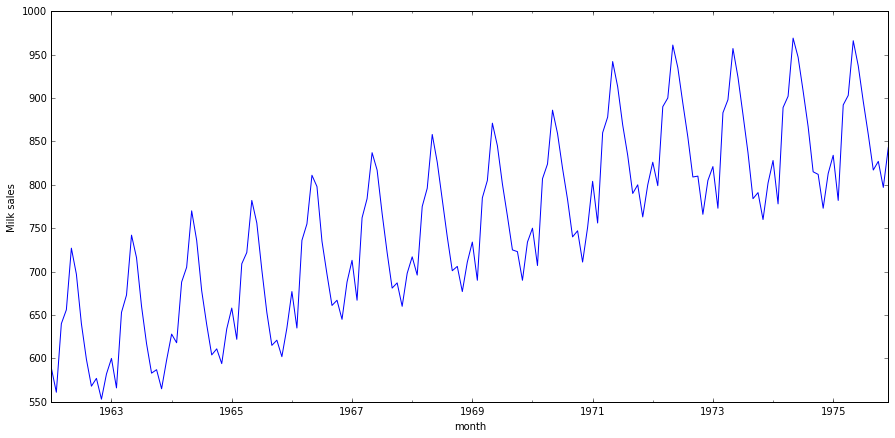

In [5]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
plt.figure(figsize(15,7))
milk.milk.plot()
plt.ylabel('Milk sales')
pylab.show()

In [7]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [6]:
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221297,
 0.62742670860303162,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [ ]:
# Q4 - 0.63

In [15]:
milk.milk_avg = milk.apply(lambda x: float(x[0])/x.name.days_in_month, axis=1)

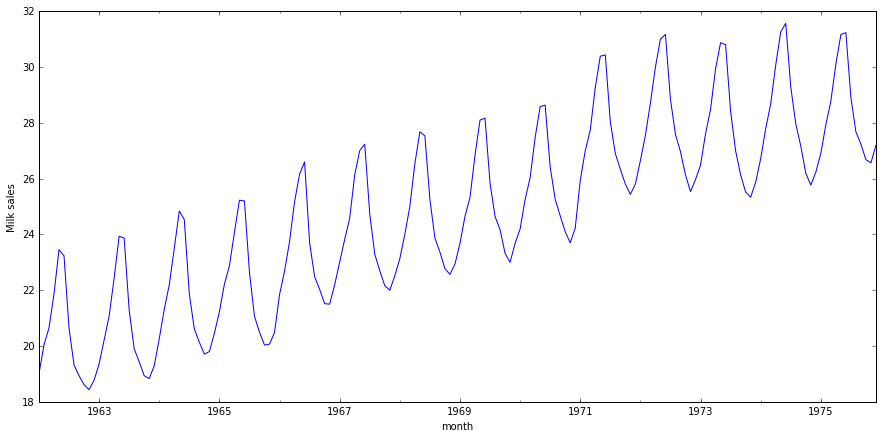

In [18]:
plt.figure(figsize(15,7))
milk.milk_avg.plot()
plt.ylabel('Milk sales')
pylab.show()

In [19]:
np.sum(milk.milk_avg)

4166.326661899464

In [ ]:
#Q5 - 4166.33

## Quiz 2

In [20]:
milk.daily_diff1 = milk.milk_avg - milk.milk_avg.shift(1)

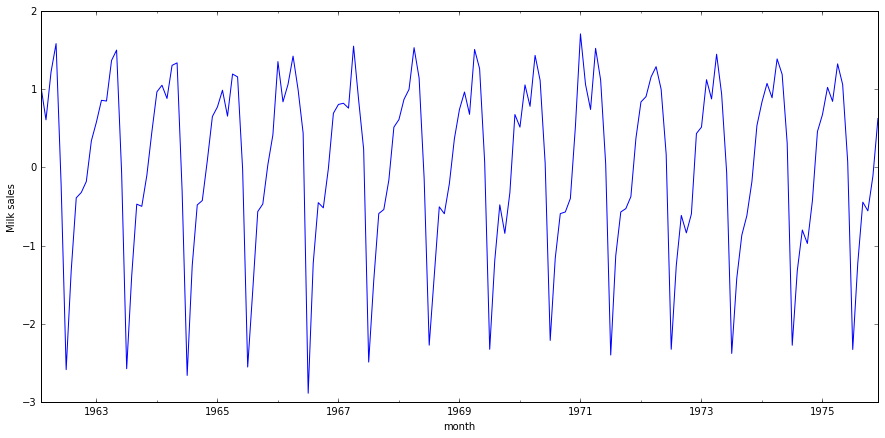

In [30]:
plt.figure(figsize(15,7))
milk.daily_diff1[1:].plot()
plt.ylabel('Milk sales')
pylab.show()

In [21]:
milk.daily_diff12 = milk.milk_avg - milk.milk_avg.shift(12)

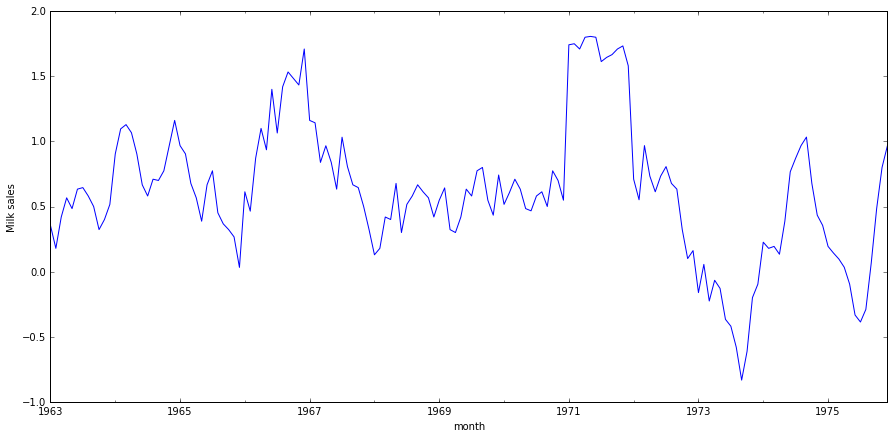

In [31]:
plt.figure(figsize(15,7))
milk.daily_diff12[12:].plot()
plt.ylabel('Milk sales')
pylab.show()

In [22]:
milk.daily_diff1.head()

month
1962-01-01         NaN
1962-02-01    1.035714
1962-03-01    0.609447
1962-04-01    1.221505
1962-05-01    1.584946
dtype: float64

In [24]:
sm.tsa.stattools.adfuller(milk.daily_diff1[1:])

(-2.7594694762289298,
 0.064300546541743997,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.153997338105512)

In [25]:
sm.tsa.stattools.adfuller(milk.daily_diff12[12:])

(-2.1594860932888089,
 0.22127672658830333,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [26]:
milk.daily_diff12_1 = milk.daily_diff12 - milk.daily_diff12.shift(1)

In [27]:
sm.tsa.stattools.adfuller(milk.daily_diff12_1[13:])

(-5.4813263347969299,
 2.2808455518036924e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.905137509892427)

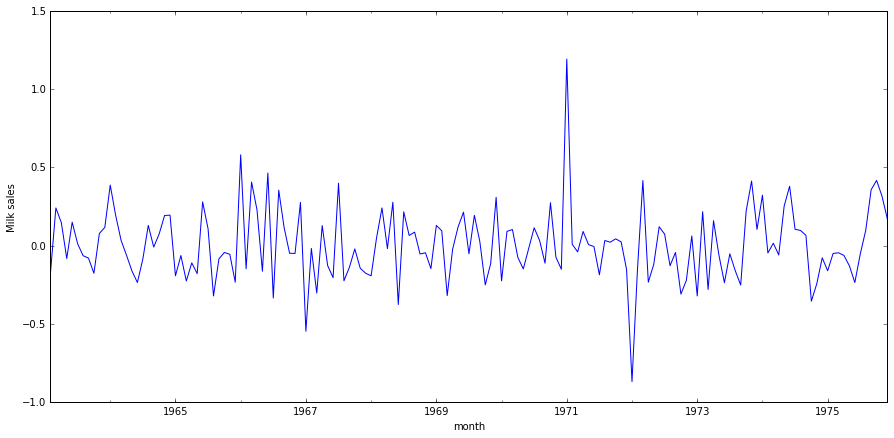

In [29]:
plt.figure(figsize(15,7))
milk.daily_diff12_1[13:].plot()
plt.ylabel('Milk sales')
pylab.show()

In [33]:
# Q8

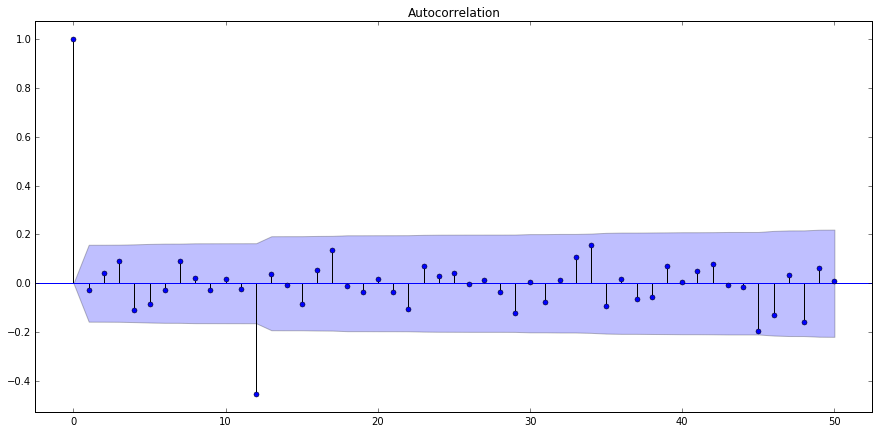

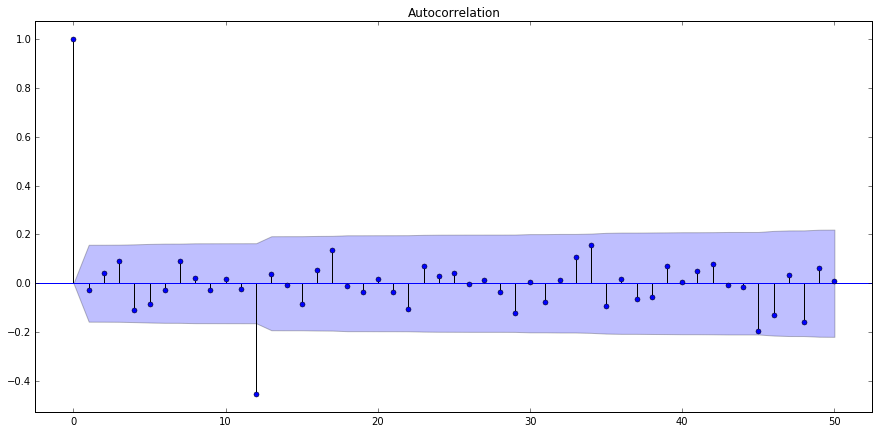

In [34]:
sm.graphics.tsa.plot_acf(milk.daily_diff12_1[13:].values.squeeze(), lags=50)

In [35]:
#Q8 - 1

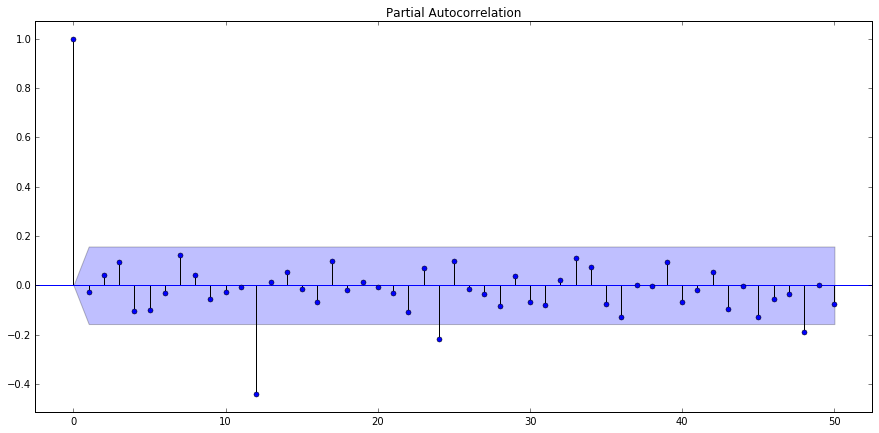

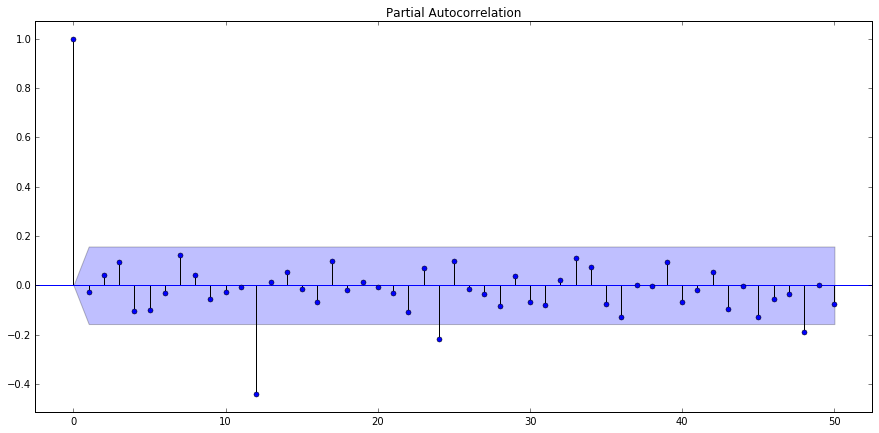

In [39]:
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1[13:].values.squeeze(), lags=50)

In [37]:
#Q9 - p = 0